In [1]:
#Prepare the file by importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Bring in the data by reading from its web location.  Include sep='\s+' because space delimiter not commas.  Headers = None because the file doesn't include column names
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt", sep= '\s+', header=None)


In [3]:
#Give all the columns in the data frame the proper names.  The '1' at the end is for a column that was not specified in the README
data.columns=['Area','Perimeter','Compactness','Length of Kernal','Width of Kernel','Asymmetry Coefficient','Length of kernel groove','Class']

In [46]:
#Drop the 8th column of unknown data so we only have our attributes of interest.  While doing so rename our operating data frame to df
#df = data.drop(columns=['1'])

In [4]:
#Look at the first 10 rows to make sure the data in the data frame matches what we have in the text file online
data.head(10)

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [5]:
#determine the data types of all the attributes.
data.dtypes
#After running we find that all of the attributes are floats except class which is type int

Area                       float64
Perimeter                  float64
Compactness                float64
Length of Kernal           float64
Width of Kernel            float64
Asymmetry Coefficient      float64
Length of kernel groove    float64
Class                        int64
dtype: object

In [6]:
#First look at some of the descriptive statistics of our data
data.describe()

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
#Separate the first type of seed into its own class
data_1 = data[data['Class']==1]

In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     70 non-null     float64
 1   Perimeter                70 non-null     float64
 2   Compactness              70 non-null     float64
 3   Length of Kernal         70 non-null     float64
 4   Width of Kernel          70 non-null     float64
 5   Asymmetry Coefficient    70 non-null     float64
 6   Length of kernel groove  70 non-null     float64
 7   Class                    70 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 4.9 KB


In [11]:
#do the same thing for class 2 and 3
data_2 = data[data['Class']==2]
data_3 = data[data['Class']==3]

In [13]:
#Check class 2 and 3
#data_2.info()
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 140 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     70 non-null     float64
 1   Perimeter                70 non-null     float64
 2   Compactness              70 non-null     float64
 3   Length of Kernal         70 non-null     float64
 4   Width of Kernel          70 non-null     float64
 5   Asymmetry Coefficient    70 non-null     float64
 6   Length of kernel groove  70 non-null     float64
 7   Class                    70 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 4.9 KB


In [23]:
#find the descriptive statistics for each class
data_1.describe()
#data_1['Area'].mean()

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214,1.0
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699,0.0
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000,1.0
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500,1.0
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000,1.0
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500,1.0
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000,1.0


In [15]:
data_2.describe()

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600,2.0
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934,0.0
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000,2.0
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500,2.0
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500,2.0
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750,2.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,2.0


In [16]:
data_3.describe()

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400,3.0
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000,3.0
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000,3.0
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500,3.0
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500,3.0
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000,3.0


In [17]:
#make a copy of the original data frame to add new columns for euclidean distance calculation
df_two = data.copy()

In [24]:
#Before finding euclidean distance define the mean for each attribute which will be used in the distance equation
#First we will do class 1

Area_Mean_1 = data_1['Area'].mean()
Perimeter_Mean_1= data_1['Perimeter'].mean()
Compactness_Mean_1= data_1['Compactness'].mean()
LOK_Mean_1= data_1['Length of Kernal'].mean()
WOK_Mean_1= data_1['Width of Kernel'].mean()
AsymmetryCoeff_Mean_1= data_1['Asymmetry Coefficient'].mean()
LOKG_Mean_1= data_1['Length of kernel groove'].mean()

In [30]:
#Euclidean Distance calculation for class 1
df_two['mean_class1_dist'] = np.sqrt(np.square(df_two['Area'] - Area_Mean_1) + np.square(df_two['Perimeter'] - Perimeter_Mean_1)+ np.square(df_two['Compactness'] - Compactness_Mean_1) + np.square(df_two['Length of Kernal'] - LOK_Mean_1) + np.square(df_two['Width of Kernel'] - WOK_Mean_1) + np.square(df_two['Asymmetry Coefficient'] - AsymmetryCoeff_Mean_1) + np.square(df_two['Length of kernel groove'] - LOKG_Mean_1))

In [31]:
df_two.head()

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class,mean_class1_dist
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1.200421
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1.766730
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0.411982
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0.817671
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,2.366002


In [32]:
#Time to do the same thing for class 2
Area_Mean_2 = data_2['Area'].mean()
Perimeter_Mean_2= data_2['Perimeter'].mean()
Compactness_Mean_2= data_2['Compactness'].mean()
LOK_Mean_2= data_2['Length of Kernal'].mean()
WOK_Mean_2= data_2['Width of Kernel'].mean()
AsymmetryCoeff_Mean_2= data_2['Asymmetry Coefficient'].mean()
LOKG_Mean_2= data_2['Length of kernel groove'].mean()

In [33]:
#Euclidean Distance calculation for class 2
df_two['mean_class2_dist'] = np.sqrt(np.square(df_two['Area'] - Area_Mean_2) + np.square(df_two['Perimeter'] - Perimeter_Mean_2)+ np.square(df_two['Compactness'] - Compactness_Mean_2) + np.square(df_two['Length of Kernal'] - LOK_Mean_2) + np.square(df_two['Width of Kernel'] - WOK_Mean_2) + np.square(df_two['Asymmetry Coefficient'] - AsymmetryCoeff_Mean_2) + np.square(df_two['Length of kernel groove'] - LOKG_Mean_2))

In [34]:
df_two.head()

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class,mean_class1_dist,mean_class2_dist
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1.200421,3.752360
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1.766730,4.784193
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0.411982,4.869911
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0.817671,5.402417
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,2.366002,3.512779


In [35]:
#Time to do the same thing for class 3
Area_Mean_3 = data_3['Area'].mean()
Perimeter_Mean_3= data_3['Perimeter'].mean()
Compactness_Mean_3= data_3['Compactness'].mean()
LOK_Mean_3= data_3['Length of Kernal'].mean()
WOK_Mean_3= data_3['Width of Kernel'].mean()
AsymmetryCoeff_Mean_3= data_3['Asymmetry Coefficient'].mean()
LOKG_Mean_3= data_3['Length of kernel groove'].mean()

In [36]:
#Euclidean Distance calculation for class 3
df_two['mean_class3_dist'] = np.sqrt(np.square(df_two['Area'] - Area_Mean_3) + np.square(df_two['Perimeter'] - Perimeter_Mean_3)+ np.square(df_two['Compactness'] - Compactness_Mean_3) + np.square(df_two['Length of Kernal'] - LOK_Mean_3) + np.square(df_two['Width of Kernel'] - WOK_Mean_3) + np.square(df_two['Asymmetry Coefficient'] - AsymmetryCoeff_Mean_3) + np.square(df_two['Length of kernel groove'] - LOKG_Mean_3))

In [37]:
df_two.head()

,Area,Perimeter,Compactness,Length of Kernal,Width of Kernel,Asymmetry Coefficient,Length of kernel groove,Class,mean_class1_dist,mean_class2_dist,mean_class3_dist
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1.200421,3.752360,4.593278
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1.766730,4.784193,5.036125
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0.411982,4.869911,3.352288
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0.817671,5.402417,3.335645
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,2.366002,3.512779,5.806445


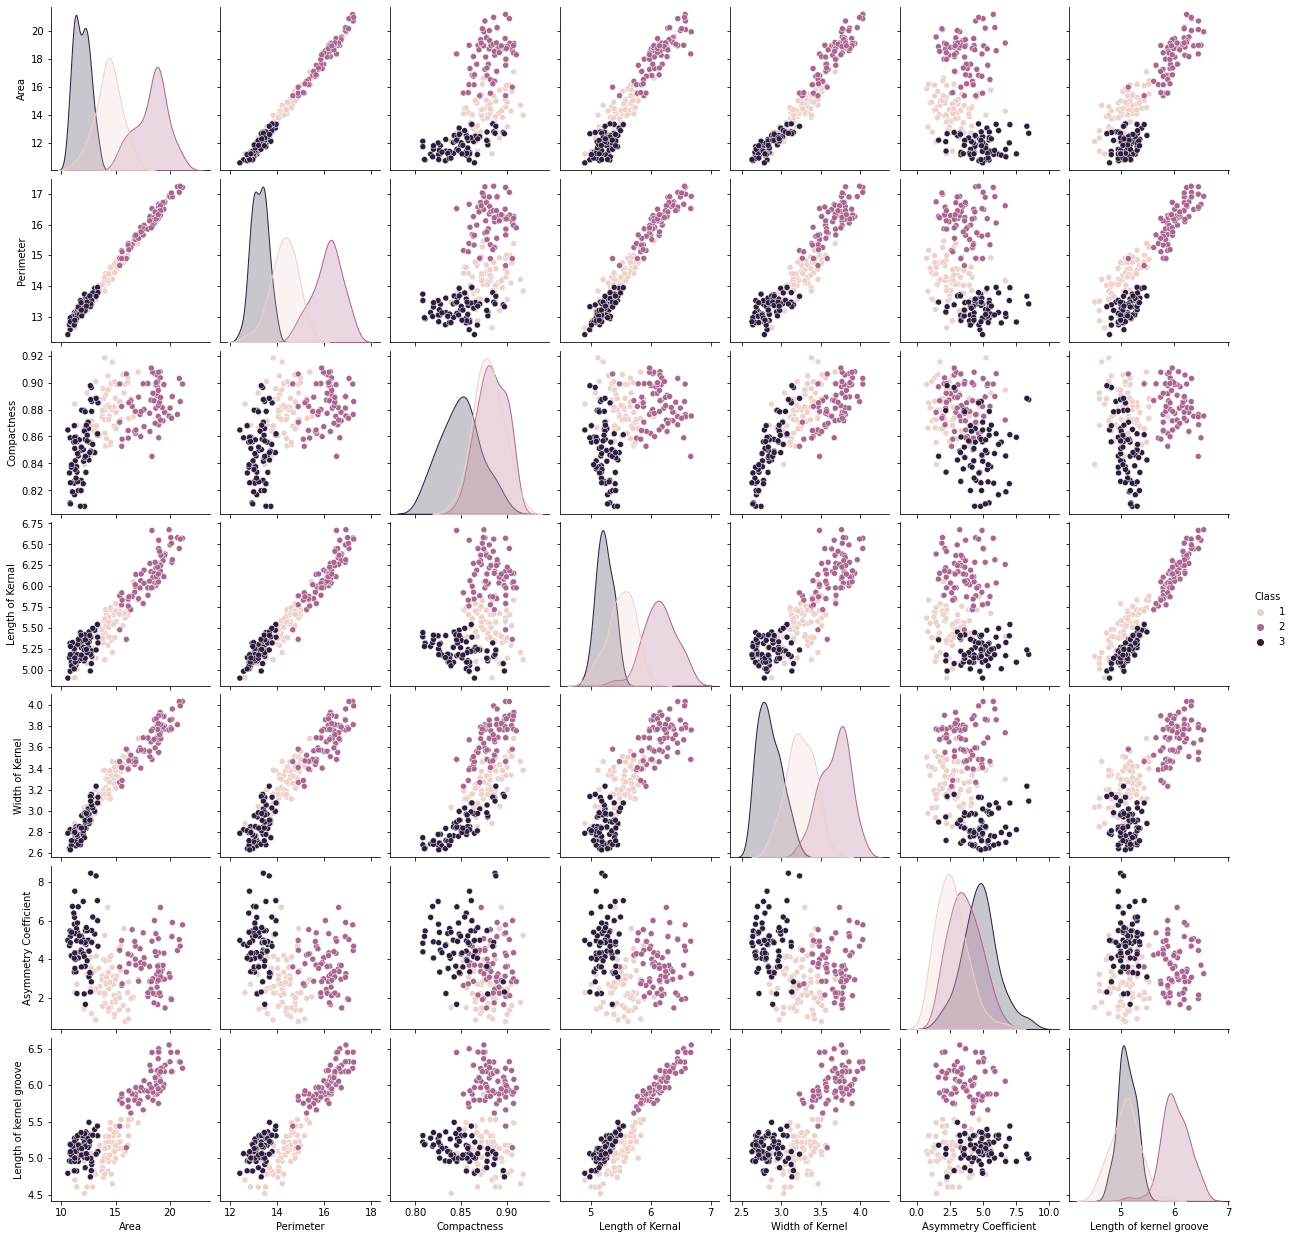

In [45]:
#Import seaborn for plotting
import seaborn as sns
sns.pairplot(data, hue = "Class")

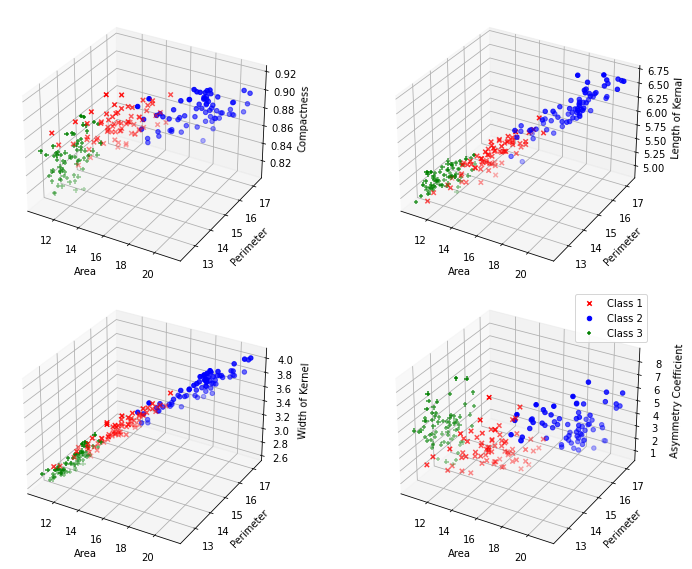

In [58]:
import itertools
from mpl_toolkits.mplot3d import Axes3D

names = list(data.columns)
names.remove("Class")
comb = list(itertools.combinations(names, 3))

fig, axs = plt.subplots(2, 2, subplot_kw={'projection':'3d'}, figsize=(12,8))


for i in range(0, 2):
    for j in range(0,2):
        axs[i,j].scatter(data[data["Class"] == 1][comb[(2*i+j)][0]],
                    data[data["Class"] == 1][comb[(2*i+j)][1]],
                    data[data["Class"] == 1][comb[(2*i+j)][2]],    
                    c = "red", marker = "x", label="Class 1")
        axs[i,j].scatter(data[data["Class"] == 2][comb[(2*i+j)][0]],
                    data[data["Class"] == 2][comb[(2*i+j)][1]],
                    data[data["Class"] == 2][comb[(2*i+j)][2]],
                    c = "blue", marker = "o", label="Class 2")

        axs[i,j].scatter(data[data["Class"] == 3][comb[(2*i+j)][0]],
                    data[data["Class"] == 3][comb[(2*i+j)][1]],
                    data[data["Class"] == 3][comb[(2*i+j)][2]],
                    c = "green", marker = "+", label="Class 3")
        
        axs[i,j].set_xlabel(comb[(2*i+j)][0])
        axs[i,j].set_ylabel(comb[(2*i+j)][1])
        axs[i,j].set_zlabel(comb[(2*i+j)][2])
        
plt.legend()
plt.tight_layout()